## Dimensionality reduction, Principal Component Analysis

### A more intuitive example

In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt

## Hardcoded input args
imgList='./Lists/ListImages.csv'
inDir='./Data/faces94'


In [2]:
## Read list of images
df = pd.read_csv(imgList)
df.shape

(3059, 4)

In [3]:
## Read images as numpy array
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape)
imgSize = imgSize[[2,0,1]]                  

dMat = np.zeros([df.shape[0], imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.head(50).iterrows():
    tmpRGB = np.asarray(Image.open(inDir + '/' + tmpRow.IMGPATH))
    tmpRGB = np.moveaxis(tmpRGB,2,0)
    tmpRGB = tmpRGB.reshape([tmpRGB.shape[0], tmpRGB.shape[1]*tmpRGB.shape[2]])
    
    dMat[i,:, :] = tmpRGB
    

Reading images ...


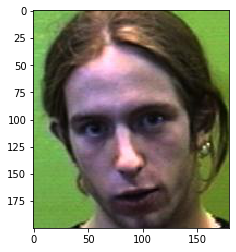

In [5]:
## Check few images
imTmp = dMat[35,:,:].reshape(imgSize)
imTmp = np.moveaxis(imTmp,0,2)
plt.imshow(imTmp)
plt.show()


In [6]:
## Read images as numpy array (as grayscale)
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape[0:2])

dMat = np.zeros([df.shape[0], np.prod(imgSize)]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.iterrows():
    tmpRGB = Image.open(inDir + '/' + tmpRow.IMGPATH)
    tmpGray = np.asarray(ImageOps.grayscale(tmpRGB)).astype(np.uint8).flatten()

    dMat[i,:] = tmpGray

Reading images ...


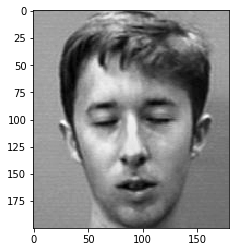

In [7]:
## Check few images
plt.imshow(dMat[217,:].reshape(imgSize).squeeze(), cmap='gray')
plt.show()

In [8]:
## Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(dMat)

numComp = 30
pca = PCA(n_components = numComp)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0,numComp).astype(str)])


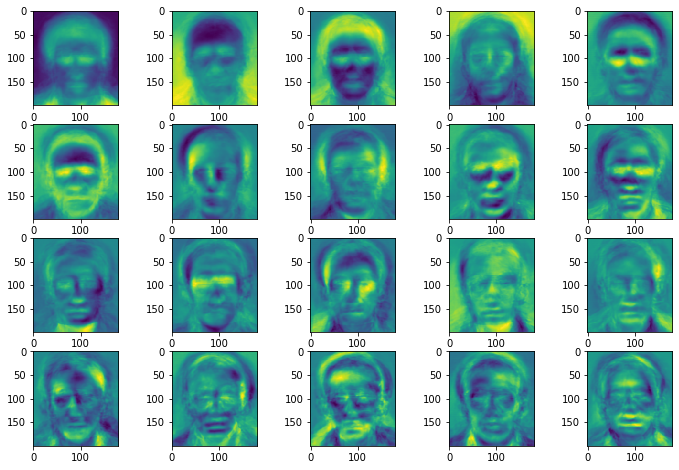

In [9]:
## Display eigenvectors
fig, axs = plt.subplots(4, 5, figsize = [ 12, 8])
for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = i*5+j
        pImg = np.array(pcaMdl.components_[ind,:]).reshape(imgSize)
        axs[i,j].imshow(pImg)
plt.show()


In [10]:
print(pcaMdl.explained_variance_ratio_)

[0.31898706 0.08692397 0.05576781 0.04448508 0.03502949 0.02865852
 0.02607636 0.01995212 0.01740525 0.01510631 0.01362665 0.01255081
 0.01153817 0.01045707 0.00953286 0.00886405 0.00836333 0.00747412
 0.00711842 0.00656833 0.00635122 0.00612399 0.0058605  0.00560548
 0.00516908 0.00510695 0.00488204 0.00470147 0.00439885 0.00422585]


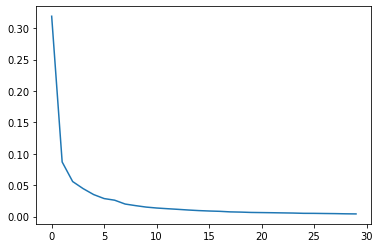

In [11]:
plt.plot(pcaMdl.explained_variance_ratio_)